In [1]:
# Project: Loan Default Prediction
# Goal: Predict whether a borrower will experience serious delinquency (SeriousDlqin2yrs)

# ==================== PART 1: IMPORT LIBRARIES ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [3]:
# ==================== PART 2: LOAD AND EXPLORE DATA ====================
# Load the dataset
df = pd.read_csv('cs-training.csv', index_col=0)

print("\n" + "="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nFirst few rows:")
print(df.head())


DATASET OVERVIEW
Dataset shape: 150000 rows, 11 columns

First few rows:
   SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                 1                              0.766127   45   
2                 0                              0.957151   40   
3                 0                              0.658180   38   
4                 0                              0.233810   30   
5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                     2   0.802982         9120.0   
2                                     0   0.121876         2600.0   
3                                     1   0.085113         3042.0   
4                                     0   0.036050         3300.0   
5                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
1                               13                 

In [4]:
print(f"\nColumn names and types:")
print(df.dtypes)


Column names and types:
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


In [5]:
print(f"\nBasic statistics:")
print(df.describe())


Basic statistics:
       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     150000.000000                         150000.000000  150000.000000   
mean           0.066840                              6.048438      52.295207   
std            0.249746                            249.755371      14.771866   
min            0.000000                              0.000000       0.000000   
25%            0.000000                              0.029867      41.000000   
50%            0.000000                              0.154181      52.000000   
75%            0.000000                              0.559046      63.000000   
max            1.000000                          50708.000000     109.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         150000.000000  150000.000000   1.202690e+05   
mean                               0.421033     353.005076   6.670221e+03   
std                          

In [12]:
# Check target variable distribution
print("\n" + "="*60)
print("TARGET VARIABLE ANALYSIS")
print("="*60)
print("SeriousDlqin2yrs distribution:")
print(df['SeriousDlqin2yrs'].value_counts())
print("\nClass balance:")
print(df['SeriousDlqin2yrs'].value_counts(normalize=True))


TARGET VARIABLE ANALYSIS
SeriousDlqin2yrs distribution:
SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

Class balance:
SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64


In [13]:
# ==================== PART 3: DATA CLEANING ====================
print("\n" + "="*60)
print("DATA CLEANING")
print("="*60)

# Check for missing values
print("Missing values per column:")
missing_vals = df.isnull().sum()
print(missing_vals[missing_vals > 0])


DATA CLEANING
Missing values per column:
MonthlyIncome         29731
NumberOfDependents     3924
dtype: int64


In [16]:
# Handle missing values
# For MonthlyIncome and NumberOfDependents, we'll use median imputation
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)

print("\n✓ Missing values handled using median imputation")

# Check for any remaining missing values
print(f"Remaining missing values: {df.isnull().sum().sum()}")


✓ Missing values handled using median imputation
Remaining missing values: 0


In [17]:
# ==================== PART 4: EXPLORATORY DATA ANALYSIS ====================
print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS")
print("="*60)


EXPLORATORY DATA ANALYSIS


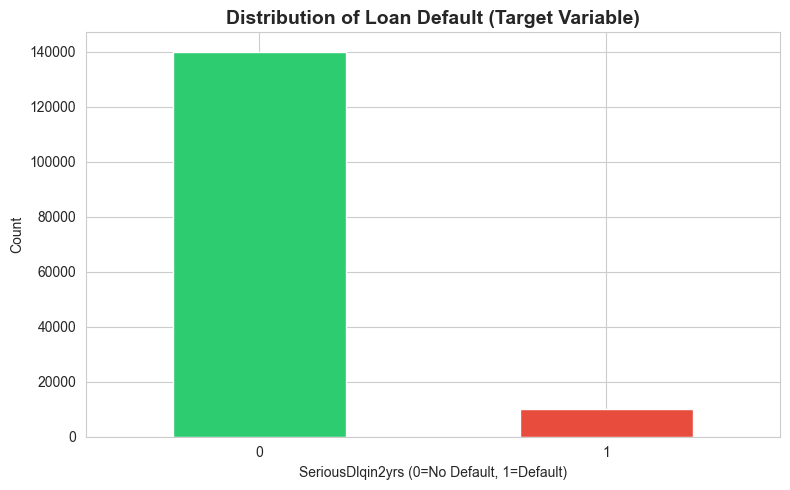

In [28]:
# Visualize target variable distribution
plt.figure(figsize=(8, 5))
df['SeriousDlqin2yrs'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribution of Loan Default (Target Variable)', fontsize=14, fontweight='bold')
plt.xlabel('SeriousDlqin2yrs (0=No Default, 1=Default)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

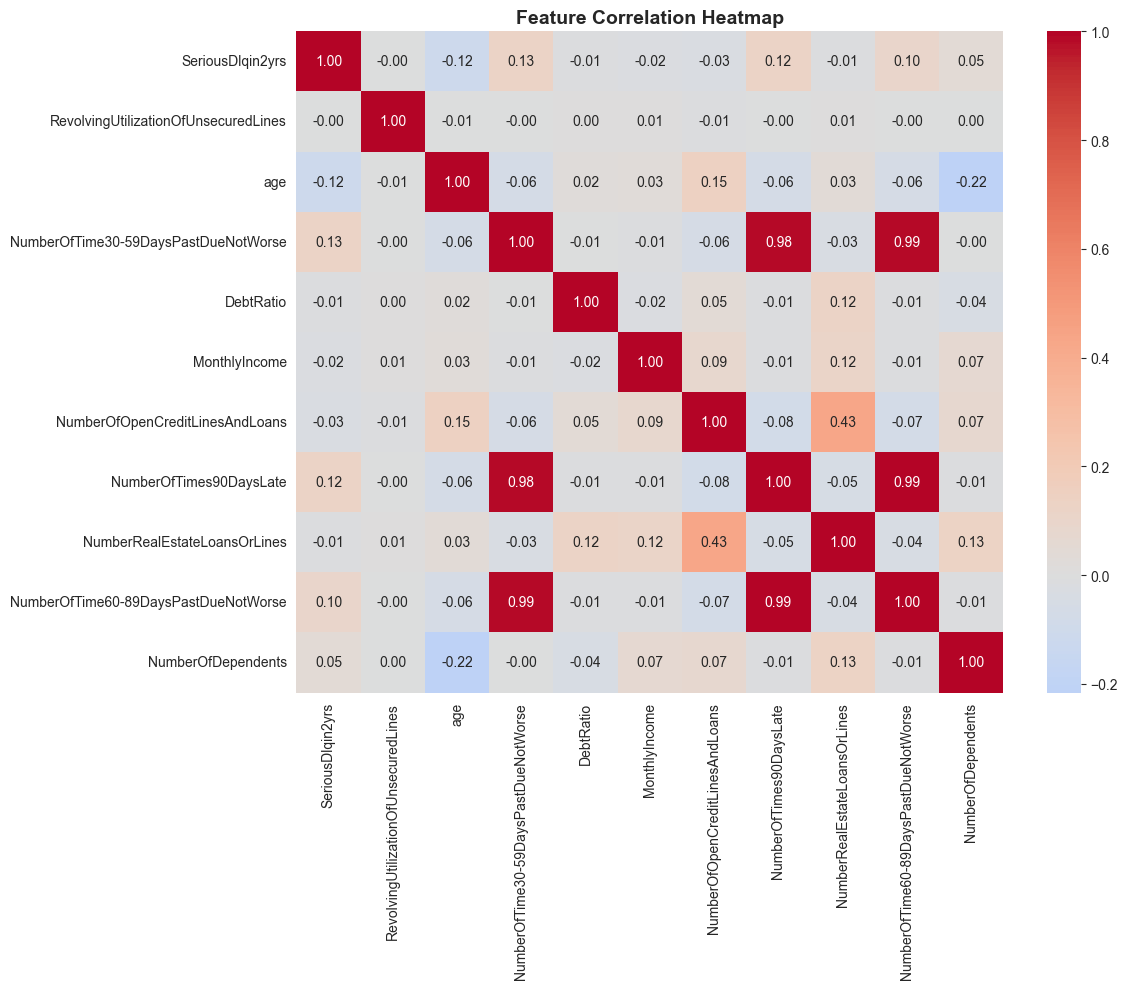

In [29]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

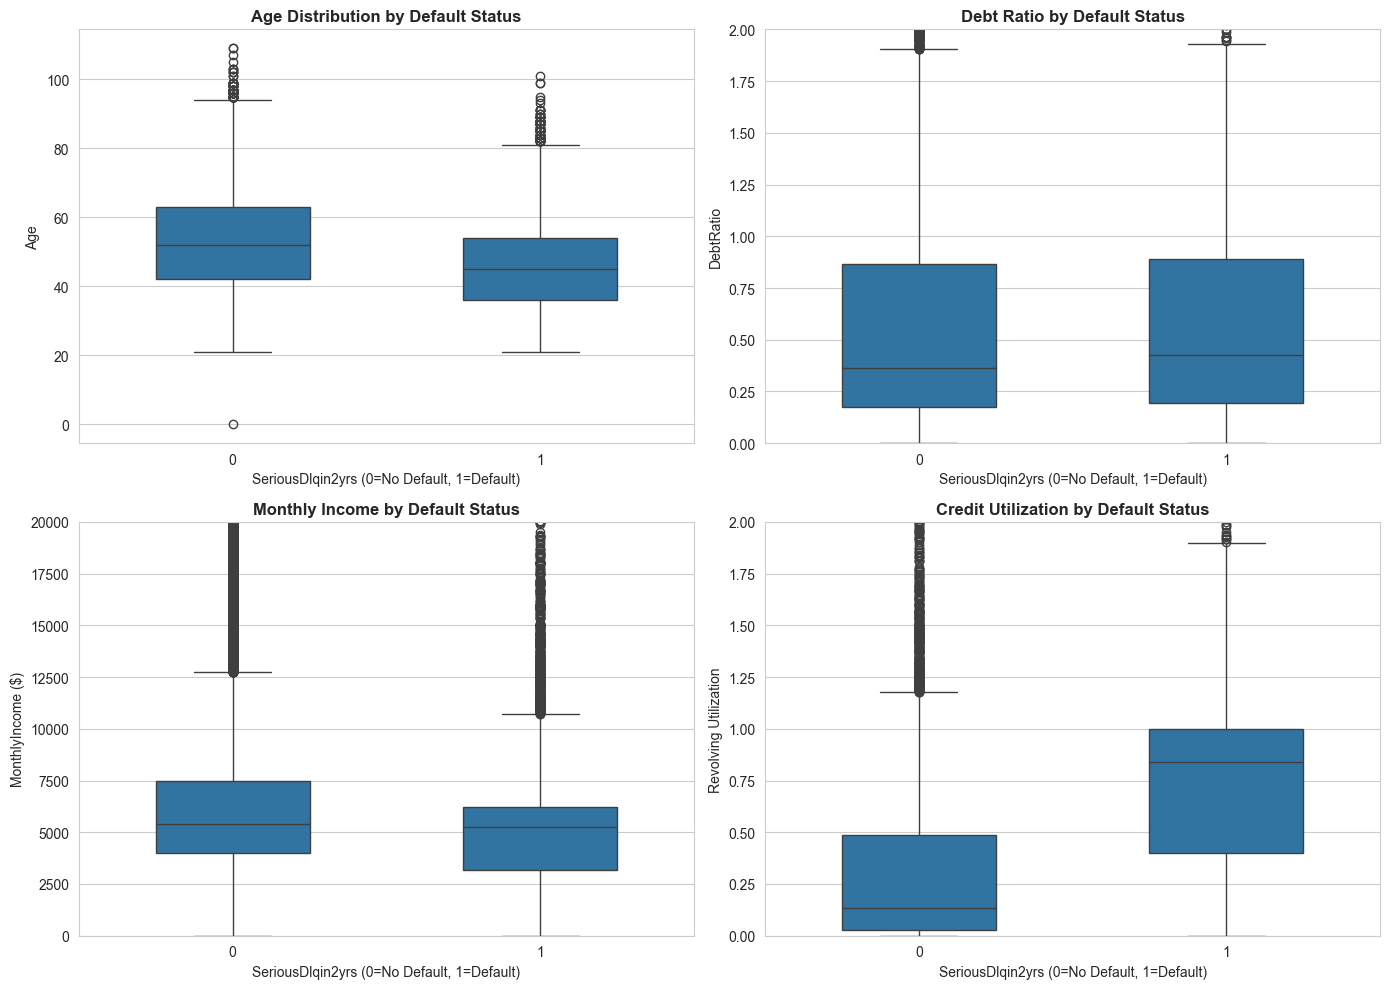

In [32]:
# Key features vs target - with better box visibility
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# OPTION 1: Using seaborn for better control (recommended)
# Age distribution by default status
sns.boxplot(data=df, x='SeriousDlqin2yrs', y='age', ax=axes[0, 0], width=0.5)
axes[0, 0].set_title('Age Distribution by Default Status', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('SeriousDlqin2yrs (0=No Default, 1=Default)')
axes[0, 0].set_ylabel('Age')

# Debt Ratio - with y-axis limit to focus on main distribution
sns.boxplot(data=df, x='SeriousDlqin2yrs', y='DebtRatio', ax=axes[0, 1], width=0.5)
axes[0, 1].set_title('Debt Ratio by Default Status', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('SeriousDlqin2yrs (0=No Default, 1=Default)')
axes[0, 1].set_ylabel('DebtRatio')
# Limit y-axis to show boxes better (removes extreme outliers from view)
axes[0, 1].set_ylim(0, 2)  # Adjusted based on data

# Monthly Income - with y-axis limit
sns.boxplot(data=df, x='SeriousDlqin2yrs', y='MonthlyIncome', ax=axes[1, 0], width=0.5)
axes[1, 0].set_title('Monthly Income by Default Status', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('SeriousDlqin2yrs (0=No Default, 1=Default)')
axes[1, 0].set_ylabel('MonthlyIncome ($)')
# Limit to reasonable income range
axes[1, 0].set_ylim(0, 20000)  # Adjusted based on data

# Revolving Utilization - with y-axis limit
sns.boxplot(data=df, x='SeriousDlqin2yrs', y='RevolvingUtilizationOfUnsecuredLines', 
            ax=axes[1, 1], width=0.5)
axes[1, 1].set_title('Credit Utilization by Default Status', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('SeriousDlqin2yrs (0=No Default, 1=Default)')
axes[1, 1].set_ylabel('Revolving Utilization')
# Limit to 0-1 range (or 0-2 if some values exceed 100%)
axes[1, 1].set_ylim(0, 2)  # Adjusted based on data

plt.tight_layout()
plt.savefig('feature_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
# ALTERNATIVE: Show outlier statistics separately
print("\n" + "="*60)
print("OUTLIER ANALYSIS")
print("="*60)
print("\nDebtRatio outliers (values > 2):")
print(f"Count: {(df['DebtRatio'] > 2).sum()} out of {len(df)}")
print(f"Max value: {df['DebtRatio'].max():.2f}")

print("\nMonthlyIncome outliers (values > 20000):")
print(f"Count: {(df['MonthlyIncome'] > 20000).sum()} out of {len(df)}")
print(f"Max value: {df['MonthlyIncome'].max():.2f}")


OUTLIER ANALYSIS

DebtRatio outliers (values > 2):
Count: 31045 out of 150000
Max value: 329664.00

MonthlyIncome outliers (values > 20000):
Count: 2103 out of 150000
Max value: 3008750.00
